In [10]:
import numpy as np 
import pandas as pd 
import os
import shutil
import matplotlib.pyplot as plt
import numpy as np

In [11]:
output_dir = "/combined_files"
shutil.rmtree(output_dir, ignore_errors=True)
os.makedirs(output_dir, exist_ok=True)
print(f"Contents of {output_dir} cleared.")

Contents of /combined_files cleared.


In [12]:
!ls 
!unzip -o 16000_pcm_speeches.zip -d speaker-recognition-dataset/

(2232)-gyan-sutra-p.pdf
01-Assignments.pdf
01-NumberSystemsAndCodes.pdf
01103327-2021-03-06.pdf
01HCORDER(2).pdf
01HCORDER.pdf
01_REVISED_SCHEDULE_OF_SPOT_ADMISSIONS_17-10-2022(1).pdf
01_REVISED_SCHEDULE_OF_SPOT_ADMISSIONS_17-10-2022(2).pdf
01_REVISED_SCHEDULE_OF_SPOT_ADMISSIONS_17-10-2022.pdf
01_Syllabus_2020_21.pdf
01_Syllabus_2021_22.pdf
01_Syllabus_2022_23(1).pdf
01_Syllabus_2022_23.pdf
02_Notification_on_Tuition_Fee_17-10-2022.pdf
02_Syllabus_2022_23(1).pdf
02_Syllabus_2022_23.pdf
03_Syllabus_2022_23(1).pdf
03_Syllabus_2022_23.pdf
03bc4864-c612-4a4a-a1c0-0cdc313ace1312th_Memo_Roshini.jpg
04_SELECTED_LIST_OF_CANDIDATES_17-10-202.pdf
04_Syllabus_2022_23(1).pdf
04_Syllabus_2022_23.pdf
05845e0ffec9d21e9b2a14619e22967a(2).pdf
05845e0ffec9d21e9b2a14619e22967a.pdf
05_MTECH_2021_22.pdf
091d3a4de7548a04bde0f49bfceafde9_MIT6_092IAP10_assn01(2).pdf
091d3a4de7548a04bde0f49bfceafde9_MIT6_092IAP10_assn01.pdf
1-1.png
1-11.png
1-2.png
1-21.png
1-3a5402d3-a521-4592-8ee9-d15f4815696b.pdf
1-CSE A.xl

In [13]:
import os
if os.path.exists("/speaker-recognition-dataset/16000_pcm_speeches"):
    print("Dataset path exists.")
else:
    print("Dataset path NOT found.")
if os.path.exists("/combined_files"):
    print("Output directory exists.")
else:
    print("Output directory NOT found.")
os.makedirs("/combined_files", exist_ok=True)
print("Output directory ensured.")

Dataset path exists.
Output directory exists.
Output directory ensured.


In [14]:
import librosa
import soundfile as sf
import os
dataset_directory = "/speaker-recognition-dataset/16000_pcm_speeches"
output_directory = "/combined_audio_files"
os.makedirs(output_directory, exist_ok=True)
speaker_list = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]
num_files_to_merge = 120
for speaker in speaker_list:
    speaker_dir = os.path.join(dataset_directory, speaker)
    audio_filenames = [f"{i}.wav" for i in range(num_files_to_merge)]
    combined_audio = []
    for filename in audio_filenames:
        file_path = os.path.join(speaker_dir, filename)
        audio, sr = librosa.load(file_path, sr=None)
        combined_audio.extend(audio)
    output_file = os.path.join(output_directory, f"{speaker}_combined.wav")
    sf.write(output_file, combined_audio, sr)
print("Merging complete. Combined files saved in:", output_directory)

Merging complete. Combined files saved in: /combined_audio_files


C:\Users\roshi\AppData\Local\Temp\ipykernel_19496\1206274320.py:18: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)


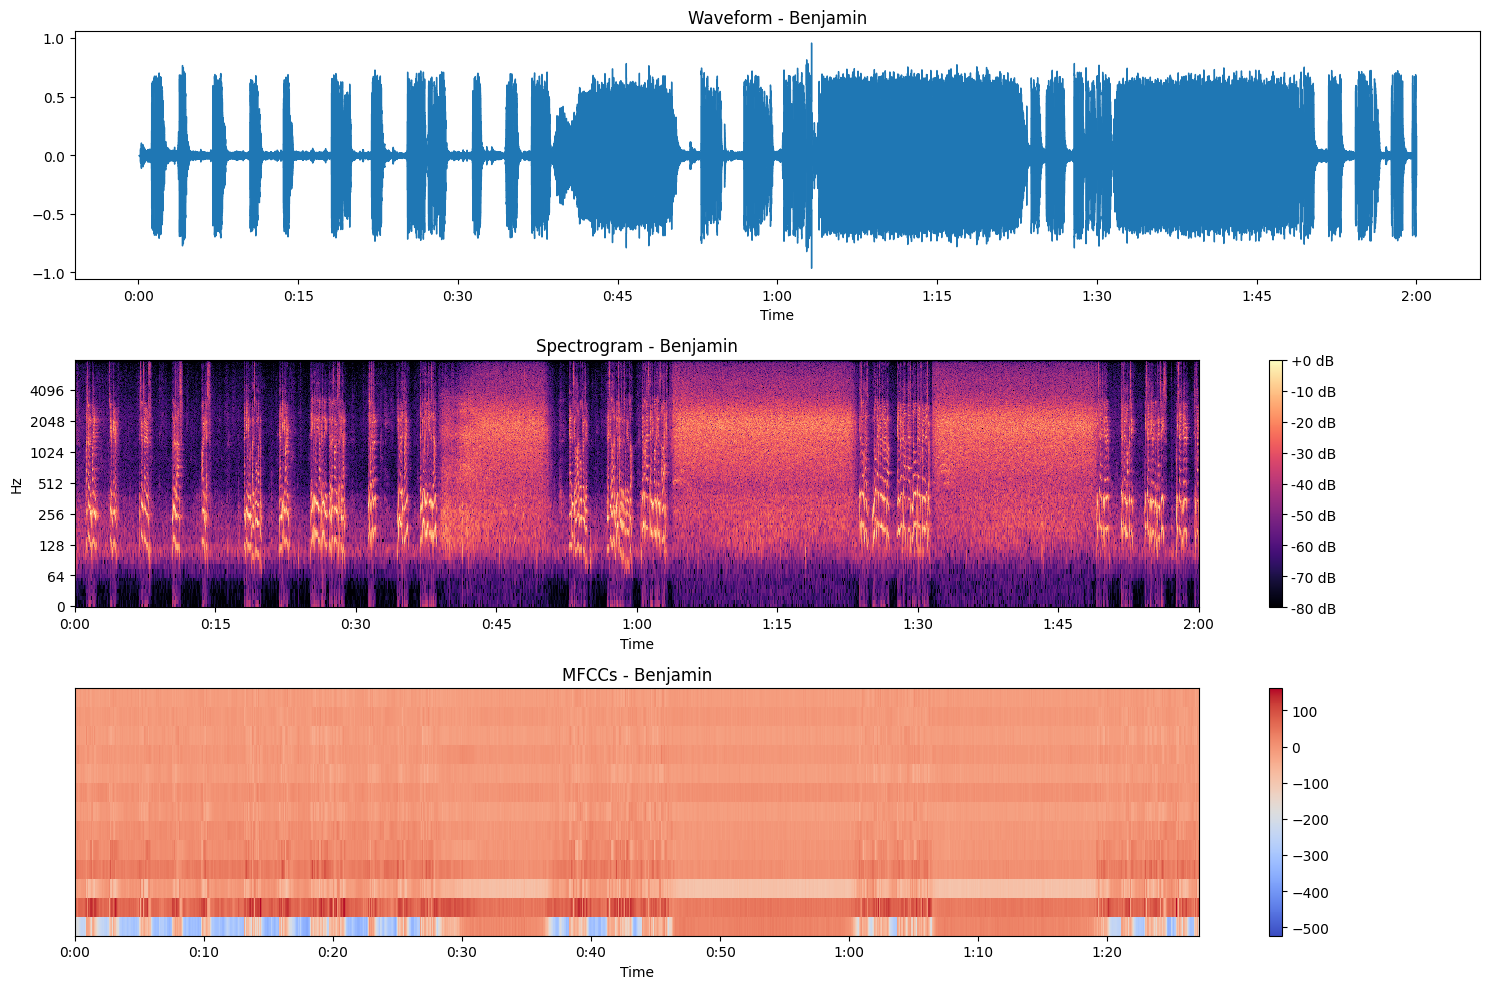

C:\Users\roshi\AppData\Local\Temp\ipykernel_19496\1206274320.py:18: UserWarning: amplitude_to_db was called on complex input so phase information will be discarded. To suppress this warning, call amplitude_to_db(np.abs(S)) instead.
  spectrogram = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)


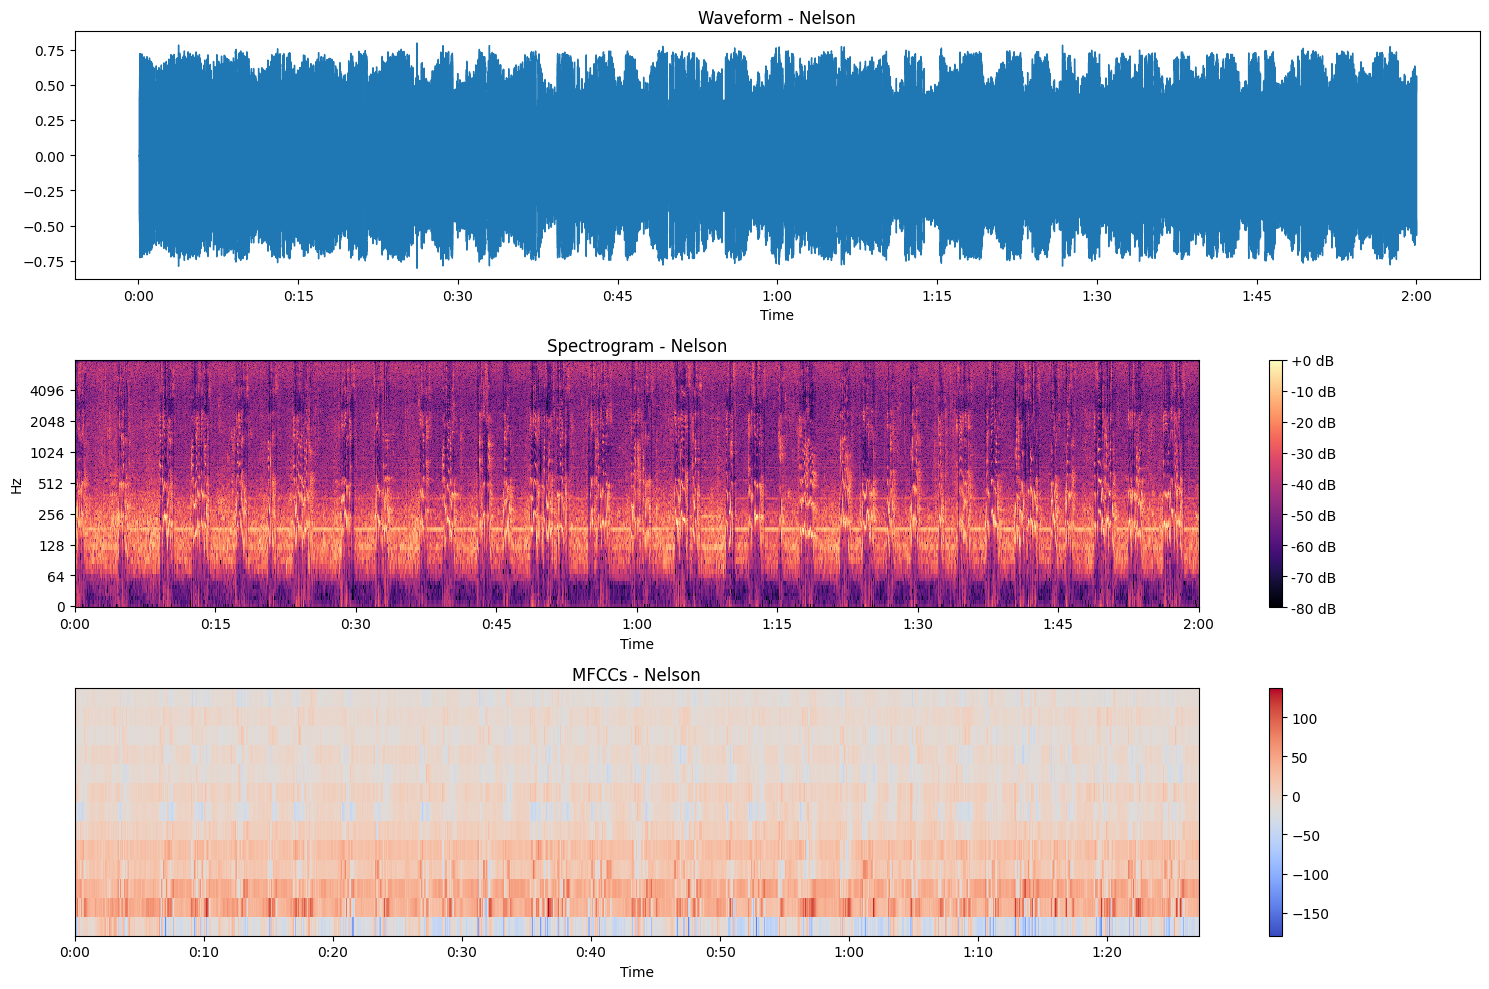

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import os
import soundfile as sf

def visualize_audio_features(file_path):
    # Load audio file using soundfile
    audio_data, sample_rate = sf.read(file_path)
    speaker = os.path.basename(file_path).split('_')[0]
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(3, 1, 1)
    librosa.display.waveshow(audio_data, sr=sample_rate)
    plt.title(f'Waveform - {speaker}')
    
    plt.subplot(3, 1, 2)
    spectrogram = librosa.amplitude_to_db(librosa.stft(audio_data), ref=np.max)
    librosa.display.specshow(spectrogram, sr=sample_rate, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram - {speaker}')
    
    plt.subplot(3, 1, 3)
    mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
    librosa.display.specshow(mfcc_features, x_axis='time')
    plt.colorbar()
    plt.title(f'MFCCs - {speaker}')
    
    plt.tight_layout()
    plt.show()

audio_files = [
    '/combined_audio_files/Benjamin_Netanyau_combined.wav',
    '/combined_audio_files/Nelson_Mandela_combined.wav'
]

for file_path in audio_files:
    visualize_audio_features(file_path)

In [18]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import os
import librosa
import numpy as np

data_directory = "/speaker-recognition-dataset/16000_pcm_speeches"
speakers = [
    "Benjamin_Netanyau",
    "Jens_Stoltenberg",
    "Julia_Gillard",
    "Magaret_Tarcher",
    "Nelson_Mandela"
]

def get_audio_features(data_directory, speakers):
    feature_list = []
    label_list = []
    for index, speaker in enumerate(speakers):
        speaker_path = os.path.join(data_directory, speaker)
        for file in os.listdir(speaker_path):
            if file.endswith(".wav"):
                file_path = os.path.join(speaker_path, file)
                audio_data, sample_rate = librosa.load(file_path, sr=None, duration=1)
                mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=13)
                mfcc_features = StandardScaler().fit_transform(mfcc_features)
                feature_list.append(mfcc_features.T)
                label_list.append(index)
    return np.array(feature_list), np.array(label_list)

X, y = get_audio_features(data_directory, speakers)

In [19]:
for sample in X[:1]:
    print(sample)

[[-3.46410155e+00  2.88717210e-01  2.88714826e-01  2.88710833e-01
   2.88705289e-01  2.88698137e-01  2.88689405e-01  2.88679123e-01
   2.88667232e-01  2.88653851e-01  2.88638890e-01  2.88622409e-01
   2.88604409e-01]
 [-3.46410155e+00  2.88697690e-01  2.88696378e-01  2.88694263e-01
   2.88691312e-01  2.88687497e-01  2.88682818e-01  2.88677305e-01
   2.88670957e-01  2.88663775e-01  2.88655698e-01  2.88646817e-01
   2.88637102e-01]
 [-3.46410179e+00  2.88694620e-01  2.88693517e-01  2.88691700e-01
   2.88689107e-01  2.88685828e-01  2.88681775e-01  2.88677037e-01
   2.88671494e-01  2.88665295e-01  2.88658351e-01  2.88650692e-01
   2.88642257e-01]
 [-3.41496515e+00  4.01689053e-01 -5.24659269e-02  6.99484348e-01
   2.78740376e-01  2.13533759e-01  3.30969393e-01  3.79182965e-01
   6.90628812e-02  2.89402455e-01  2.54391879e-01  3.14149350e-01
   2.36824632e-01]
 [-3.32731915e+00  5.34021258e-01 -3.14830184e-01  9.45635557e-01
   3.05575788e-01  2.24249989e-01  2.92698741e-01  3.76336753e-01


In [20]:
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
encoder = LabelEncoder()
encoded_labels = encoder.fit_transform(y)
encoder.classes_ = np.array(speakers)
X_train, X_temp, y_train, y_temp = train_test_split(X, encoded_labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
print("Training Data Shape:", X_train.shape)
print("Validation Data Shape:", X_val.shape)
print("Test Data Shape:", X_test.shape)

Training Data Shape: (5250, 32, 13)
Validation Data Shape: (1125, 32, 13)
Test Data Shape: (1126, 32, 13)


Epoch 1/20


c:\Users\roshi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


165/165 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.7019 - loss: 0.7865 - val_accuracy: 0.8951 - val_loss: 0.2490
Epoch 2/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 24ms/step - accuracy: 0.9139 - loss: 0.2334 - val_accuracy: 0.9458 - val_loss: 0.1645
Epoch 3/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 23ms/step - accuracy: 0.9552 - loss: 0.1346 - val_accuracy: 0.9440 - val_loss: 0.1512
Epoch 4/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 21ms/step - accuracy: 0.9522 - loss: 0.1297 - val_accuracy: 0.9502 - val_loss: 0.1300
Epoch 5/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.9676 - loss: 0.0902 - val_accuracy: 0.9813 - val_loss: 0.0736
Epoch 6/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9665 - loss: 0.1048 - val_accuracy: 0.9609 - val_loss: 0.1317
Epoch 7/20
165/165 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.9680 - loss: 0.0991 - val_accuracy: 0.9733 - val_loss: 0.0910
Early stopping triggered at epoch 7


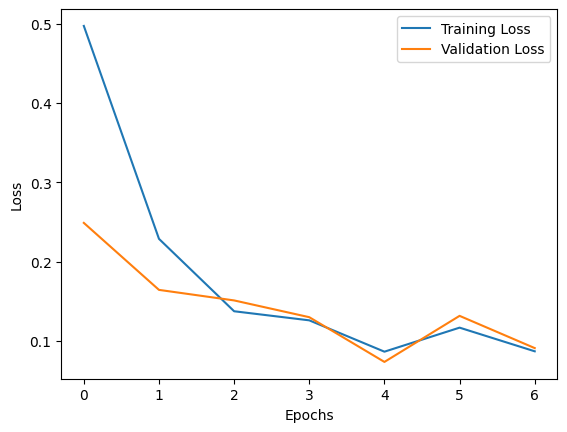

In [21]:

neural_net = tf.keras.Sequential([
    tf.keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(len(speakers), activation='softmax')
])
neural_net.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
early_stop_callback = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)
training_history = neural_net.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=20, batch_size=32, callbacks=[early_stop_callback])
if early_stop_callback.stopped_epoch > 0:
    print("Early stopping triggered at epoch", early_stop_callback.stopped_epoch + 1)
else:
    print("Training completed without early stopping")
plt.plot(training_history.history['loss'], label='Training Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

36/36 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step
Test Evaluation Accuracy: 0.9795737122557726
Weighted F1 Score: 0.9795361919108894


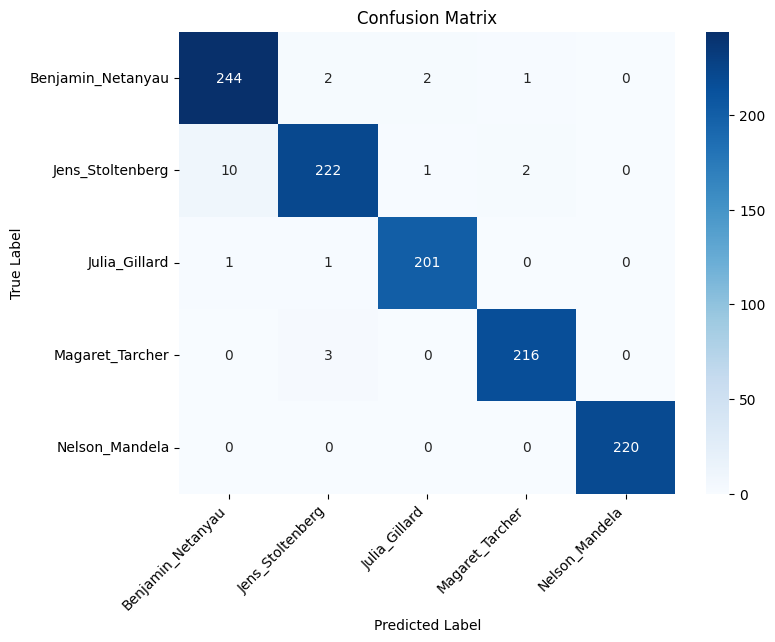

In [22]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score
predicted_probabilities = neural_net.predict(X_test)
predicted_labels = np.argmax(predicted_probabilities, axis=1)
true_labels_decoded = encoder.inverse_transform(y_test)
predicted_labels_decoded = encoder.inverse_transform(predicted_labels)
conf_matrix = confusion_matrix(true_labels_decoded, predicted_labels_decoded, labels=speakers)
test_accuracy = accuracy_score(true_labels_decoded, predicted_labels_decoded)
print(f"Test Evaluation Accuracy: {test_accuracy}")
weighted_f1 = f1_score(true_labels_decoded, predicted_labels_decoded, labels=speakers, average='weighted')
print(f"Weighted F1 Score: {weighted_f1}")
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=speakers, yticklabels=speakers)
plt.xticks(rotation=45, ha="right")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
Predicted Speaker: Magaret_Tarcher


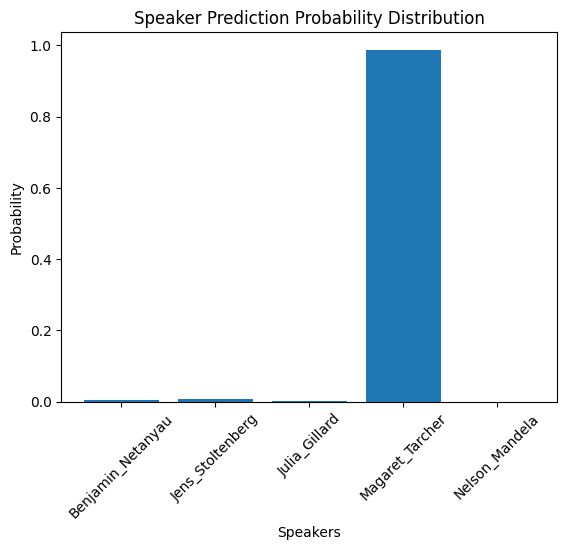

In [38]:
import os
import librosa
import numpy as np
import matplotlib.pyplot as plt

def process_audio(file_path, n_mfcc=13, max_pad_len=X_train.shape[1]):
    try:
        audio_data, sample_rate = librosa.load(file_path, sr=22050)
        mfcc_features = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=n_mfcc)
        pad_width = max_pad_len - mfcc_features.shape[1]
        if pad_width > 0:
            mfcc_features = np.pad(mfcc_features, pad_width=((0, 0), (0, pad_width)), mode='constant')
        else:
            mfcc_features = mfcc_features[:, :max_pad_len]
        mfcc_features = (mfcc_features - np.mean(mfcc_features)) / np.std(mfcc_features)
        mfcc_features = np.expand_dims(mfcc_features.T, axis=0)
        return mfcc_features
    except Exception as e:
        print(f"Error in processing the audio file: {e}")
        return None

def identify_speaker(file_path):
    features = process_audio(file_path)
    if features is None:
        print("Could not process the input file.")
        return
    predictions = neural_net.predict(features)
    predicted_index = np.argmax(predictions)
    predicted_speaker = encoder.inverse_transform([predicted_index])[0]
    print(f"Predicted Speaker: {predicted_speaker}")
    plt.bar(range(len(speakers)), predictions[0])
    plt.xticks(range(len(speakers)), speakers, rotation=45)
    plt.xlabel('Speakers')
    plt.ylabel('Probability')
    plt.title('Speaker Prediction Probability Distribution')
    plt.show()

audio_file_path ="speaker-recognition-dataset\\16000_pcm_speeches\Magaret_Tarcher\977.wav" #Enter file path here
if os.path.exists(audio_file_path):
    identify_speaker(audio_file_path)
else:
    print(f"File {audio_file_path} does not exist.")